In [49]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

In [50]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

In [51]:
print(tf.__version__)

2.1.0


In [52]:
from tensorflow.keras import models
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [53]:
df_input = pd.read_csv('current density2 0.4-0.9V_std', usecols=[1,2,3])

In [54]:
df_output = pd. read_csv('current density2 0.4-0.9V_std', usecols=[4])

In [55]:
df_input.shape

(31636, 3)

In [56]:
df_output.shape

(31636, 1)

In [57]:
x_train, x_test, y_train, y_test = train_test_split(df_input, df_output, test_size=0.1, random_state=0)

In [58]:
print(x_train.shape,x_test.shape)

(28472, 3) (3164, 3)


In [59]:
x_train

,x座標,y座標,V[V]
17676,-1.063164,0.480150,0.224769
30131,-0.569786,-1.450546,1.493249
11031,1.284606,0.764567,-0.409472
6840,-0.022068,-0.049329,-1.360832
29412,0.917878,-1.068396,1.493249
...,...,...,...
13123,-1.677761,-1.602093,-0.409472
19648,0.253005,-0.367788,0.541889
9845,-0.583430,0.141746,-0.726592
10799,1.599377,1.520386,-0.409472


In [60]:
y_train

,i[A/m^2]
17676,-0.240928
30131,-1.301885
11031,-0.004455
6840,1.578582
29412,-1.347140
...,...
13123,1.276845
19648,-0.543908
9845,1.211591
10799,-0.095977


In [75]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import regularizers, initializers

weights = [com.get_weights() for com in model.layers[0:]]
model = Sequential()



model.add(Dense(units=32, input_shape=(3,), activation='tanh'))  
model.add(Dense(units=10, activation='tanh'))  #xとyが-1～1なのでtanh
model.add(Dense(units=10, activation='tanh'))
model.add(Dense(units=1, activation='linear'))  #隠れ層3層でやってみる

model.compile(loss='mean_squared_error',    #出力は?連続値?なので平均二乗誤差
              optimizer='adam',             #とりあえずadamで
              metrics=['mse'])

In [71]:
callbacks = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_mse',
                            factor=0.2,
                            patience=5,
                            mode="auto",
                            min_lr=0.001)
history =  model.fit(x=x_train,
                     y=y_train,
                     epochs = 2000,
                     batch_size=200,
                     validation_data=(x_test, y_test),
                     callbacks=[callbacks])

Train on 28472 samples, validate on 3164 samples
Epoch 1/2000
28472/28472 [==============================] - 1s 24us/sample - loss: 0.2258 - mse: 0.2258 - val_loss: 0.1262 - val_mse: 0.1262
Epoch 2/2000
28472/28472 [==============================] - 0s 9us/sample - loss: 0.1151 - mse: 0.1151 - val_loss: 0.1087 - val_mse: 0.1087
Epoch 3/2000
28472/28472 [==============================] - 0s 10us/sample - loss: 0.1051 - mse: 0.1051 - val_loss: 0.1019 - val_mse: 0.1019
Epoch 4/2000
28472/28472 [==============================] - 0s 9us/sample - loss: 0.1008 - mse: 0.1008 - val_loss: 0.0983 - val_mse: 0.0983
Epoch 5/2000
28472/28472 [==============================] - 0s 9us/sample - loss: 0.0989 - mse: 0.0989 - val_loss: 0.0964 - val_mse: 0.0964
Epoch 6/2000
28472/28472 [==============================] - 0s 9us/sample - loss: 0.0982 - mse: 0.0982 - val_loss: 0.0961 - val_mse: 0.0961
Epoch 7/2000
28472/28472 [==============================] - 0s 10us/sample - loss: 0.0979 - mse: 0.0979 - val

28472/28472 [==============================] - 0s 9us/sample - loss: 0.0923 - mse: 0.0923 - val_loss: 0.0902 - val_mse: 0.0902
Epoch 59/2000
28472/28472 [==============================] - 0s 9us/sample - loss: 0.0921 - mse: 0.0921 - val_loss: 0.0912 - val_mse: 0.0912
Epoch 60/2000
28472/28472 [==============================] - 0s 9us/sample - loss: 0.0923 - mse: 0.0923 - val_loss: 0.0900 - val_mse: 0.0900
Epoch 61/2000
28472/28472 [==============================] - 0s 9us/sample - loss: 0.0922 - mse: 0.0922 - val_loss: 0.0906 - val_mse: 0.0906
Epoch 62/2000
28472/28472 [==============================] - 0s 9us/sample - loss: 0.0922 - mse: 0.0922 - val_loss: 0.0901 - val_mse: 0.0901
Epoch 63/2000
28472/28472 [==============================] - 0s 9us/sample - loss: 0.0921 - mse: 0.0921 - val_loss: 0.0906 - val_mse: 0.0906
Epoch 64/2000
28472/28472 [==============================] - 0s 9us/sample - loss: 0.0921 - mse: 0.0921 - val_loss: 0.0905 - val_mse: 0.0905
Epoch 65/2000
28472/28472 [

Epoch 116/2000
28472/28472 [==============================] - 0s 9us/sample - loss: 0.0922 - mse: 0.0922 - val_loss: 0.0921 - val_mse: 0.0921
Epoch 117/2000
28472/28472 [==============================] - 0s 9us/sample - loss: 0.0923 - mse: 0.0923 - val_loss: 0.0905 - val_mse: 0.0905
Epoch 118/2000
28472/28472 [==============================] - 0s 9us/sample - loss: 0.0922 - mse: 0.0922 - val_loss: 0.0902 - val_mse: 0.0902
Epoch 119/2000
28472/28472 [==============================] - 0s 9us/sample - loss: 0.0922 - mse: 0.0922 - val_loss: 0.0904 - val_mse: 0.0904
Epoch 120/2000
28472/28472 [==============================] - 0s 9us/sample - loss: 0.0921 - mse: 0.0921 - val_loss: 0.0911 - val_mse: 0.0911
Epoch 121/2000
28472/28472 [==============================] - 0s 9us/sample - loss: 0.0919 - mse: 0.0919 - val_loss: 0.0903 - val_mse: 0.0903
Epoch 122/2000
28472/28472 [==============================] - 0s 9us/sample - loss: 0.0922 - mse: 0.0922 - val_loss: 0.0902 - val_mse: 0.0902
Epoch 

28472/28472 [==============================] - 0s 9us/sample - loss: 0.0920 - mse: 0.0920 - val_loss: 0.0910 - val_mse: 0.0910
Epoch 174/2000
28472/28472 [==============================] - 0s 9us/sample - loss: 0.0920 - mse: 0.0920 - val_loss: 0.0901 - val_mse: 0.0901
Epoch 175/2000
28472/28472 [==============================] - 0s 9us/sample - loss: 0.0918 - mse: 0.0918 - val_loss: 0.0899 - val_mse: 0.0899
Epoch 176/2000
28472/28472 [==============================] - ETA: 0s - loss: 0.0922 - mse: 0.092 - 0s 9us/sample - loss: 0.0922 - mse: 0.0922 - val_loss: 0.0906 - val_mse: 0.0906
Epoch 177/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0922 - mse: 0.0922 - val_loss: 0.0902 - val_mse: 0.0902
Epoch 178/2000
28472/28472 [==============================] - 0s 9us/sample - loss: 0.0920 - mse: 0.0920 - val_loss: 0.0899 - val_mse: 0.0899
Epoch 179/2000
28472/28472 [==============================] - 0s 9us/sample - loss: 0.0919 - mse: 0.0919 - val_loss: 0.0917 -

Epoch 230/2000
28472/28472 [==============================] - 0s 9us/sample - loss: 0.0920 - mse: 0.0920 - val_loss: 0.0914 - val_mse: 0.0914
Epoch 231/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0918 - mse: 0.0918 - val_loss: 0.0904 - val_mse: 0.0904
Epoch 232/2000
28472/28472 [==============================] - 0s 9us/sample - loss: 0.0920 - mse: 0.0920 - val_loss: 0.0901 - val_mse: 0.0901
Epoch 233/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0920 - mse: 0.0920 - val_loss: 0.0905 - val_mse: 0.0905
Epoch 234/2000
28472/28472 [==============================] - 0s 9us/sample - loss: 0.0919 - mse: 0.0919 - val_loss: 0.0902 - val_mse: 0.0902
Epoch 235/2000
28472/28472 [==============================] - 0s 9us/sample - loss: 0.0919 - mse: 0.0919 - val_loss: 0.0905 - val_mse: 0.0905
Epoch 236/2000
28472/28472 [==============================] - ETA: 0s - loss: 0.0923 - mse: 0.092 - 0s 9us/sample - loss: 0.0920 - mse: 0.0920 - val

28472/28472 [==============================] - 0s 8us/sample - loss: 0.0919 - mse: 0.0919 - val_loss: 0.0909 - val_mse: 0.0909
Epoch 288/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0918 - mse: 0.0918 - val_loss: 0.0909 - val_mse: 0.0909
Epoch 289/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0920 - mse: 0.0920 - val_loss: 0.0909 - val_mse: 0.0909
Epoch 290/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0919 - mse: 0.0919 - val_loss: 0.0911 - val_mse: 0.0911
Epoch 291/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0919 - mse: 0.0919 - val_loss: 0.0903 - val_mse: 0.0903
Epoch 292/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0921 - mse: 0.0921 - val_loss: 0.0916 - val_mse: 0.0916
Epoch 293/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0918 - mse: 0.0918 - val_loss: 0.0905 - val_mse: 0.0905
Epoch 294/2000
28472/

Epoch 345/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0918 - mse: 0.0918 - val_loss: 0.0903 - val_mse: 0.0903
Epoch 346/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0916 - mse: 0.0916 - val_loss: 0.0906 - val_mse: 0.0906
Epoch 347/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0921 - mse: 0.0921 - val_loss: 0.0903 - val_mse: 0.0903
Epoch 348/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0919 - mse: 0.0919 - val_loss: 0.0901 - val_mse: 0.0901
Epoch 349/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0921 - mse: 0.0921 - val_loss: 0.0908 - val_mse: 0.0908
Epoch 350/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0918 - mse: 0.0918 - val_loss: 0.0905 - val_mse: 0.0905
Epoch 351/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0918 - mse: 0.0918 - val_loss: 0.0901 - val_mse: 0.0901
Epoch 

28472/28472 [==============================] - 0s 10us/sample - loss: 0.0916 - mse: 0.0916 - val_loss: 0.0904 - val_mse: 0.0904
Epoch 403/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0918 - mse: 0.0918 - val_loss: 0.0907 - val_mse: 0.0907
Epoch 404/2000
28472/28472 [==============================] - 0s 9us/sample - loss: 0.0921 - mse: 0.0921 - val_loss: 0.0908 - val_mse: 0.0908
Epoch 405/2000
28472/28472 [==============================] - 0s 12us/sample - loss: 0.0919 - mse: 0.0919 - val_loss: 0.0903 - val_mse: 0.0903
Epoch 406/2000
28472/28472 [==============================] - 0s 9us/sample - loss: 0.0918 - mse: 0.0918 - val_loss: 0.0899 - val_mse: 0.0899
Epoch 407/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0917 - mse: 0.0917 - val_loss: 0.0910 - val_mse: 0.0910
Epoch 408/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0918 - mse: 0.0918 - val_loss: 0.0901 - val_mse: 0.0901
Epoch 409/2000
2847

Epoch 460/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0917 - mse: 0.0917 - val_loss: 0.0905 - val_mse: 0.0905
Epoch 461/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0916 - mse: 0.0916 - val_loss: 0.0903 - val_mse: 0.0903
Epoch 462/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0916 - mse: 0.0916 - val_loss: 0.0906 - val_mse: 0.0906
Epoch 463/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0915 - mse: 0.0915 - val_loss: 0.0910 - val_mse: 0.0910
Epoch 464/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0915 - mse: 0.0915 - val_loss: 0.0903 - val_mse: 0.0903
Epoch 465/2000
28472/28472 [==============================] - 0s 10us/sample - loss: 0.0916 - mse: 0.0916 - val_loss: 0.0909 - val_mse: 0.0909
Epoch 466/2000
28472/28472 [==============================] - 0s 10us/sample - loss: 0.0915 - mse: 0.0915 - val_loss: 0.0904 - val_mse: 0.0904
Epoc

28472/28472 [==============================] - 0s 8us/sample - loss: 0.0912 - mse: 0.0912 - val_loss: 0.0905 - val_mse: 0.0905
Epoch 518/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0910 - mse: 0.0910 - val_loss: 0.0896 - val_mse: 0.0896
Epoch 519/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0910 - mse: 0.0910 - val_loss: 0.0900 - val_mse: 0.0900
Epoch 520/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0911 - mse: 0.0911 - val_loss: 0.0908 - val_mse: 0.0908
Epoch 521/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0911 - mse: 0.0911 - val_loss: 0.0910 - val_mse: 0.0910
Epoch 522/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0910 - mse: 0.0910 - val_loss: 0.0907 - val_mse: 0.0907
Epoch 523/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0913 - mse: 0.0913 - val_loss: 0.0901 - val_mse: 0.0901
Epoch 524/2000
28472/

Epoch 575/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0904 - mse: 0.0904 - val_loss: 0.0901 - val_mse: 0.0901
Epoch 576/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0906 - mse: 0.0906 - val_loss: 0.0898 - val_mse: 0.0898
Epoch 577/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0902 - mse: 0.0902 - val_loss: 0.0897 - val_mse: 0.0897
Epoch 578/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0903 - mse: 0.0903 - val_loss: 0.0896 - val_mse: 0.0896
Epoch 579/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0904 - mse: 0.0904 - val_loss: 0.0895 - val_mse: 0.0895
Epoch 580/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0902 - mse: 0.0902 - val_loss: 0.0895 - val_mse: 0.0895
Epoch 581/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0904 - mse: 0.0904 - val_loss: 0.0898 - val_mse: 0.0898
Epoch 

28472/28472 [==============================] - ETA: 0s - loss: 0.0902 - mse: 0.090 - 0s 8us/sample - loss: 0.0900 - mse: 0.0900 - val_loss: 0.0897 - val_mse: 0.0897
Epoch 633/2000
28472/28472 [==============================] - 0s 9us/sample - loss: 0.0901 - mse: 0.0901 - val_loss: 0.0890 - val_mse: 0.0890
Epoch 634/2000
28472/28472 [==============================] - 0s 9us/sample - loss: 0.0899 - mse: 0.0899 - val_loss: 0.0896 - val_mse: 0.0896
Epoch 635/2000
28472/28472 [==============================] - 0s 11us/sample - loss: 0.0903 - mse: 0.0903 - val_loss: 0.0892 - val_mse: 0.0892
Epoch 636/2000
28472/28472 [==============================] - 0s 9us/sample - loss: 0.0898 - mse: 0.0898 - val_loss: 0.0892 - val_mse: 0.0892
Epoch 637/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0900 - mse: 0.0900 - val_loss: 0.0896 - val_mse: 0.0896
Epoch 638/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0900 - mse: 0.0900 - val_loss: 0.0903 

Epoch 689/2000
28472/28472 [==============================] - 0s 9us/sample - loss: 0.0897 - mse: 0.0897 - val_loss: 0.0892 - val_mse: 0.0892
Epoch 690/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0900 - mse: 0.0900 - val_loss: 0.0887 - val_mse: 0.0887
Epoch 691/2000
28472/28472 [==============================] - 0s 9us/sample - loss: 0.0896 - mse: 0.0896 - val_loss: 0.0890 - val_mse: 0.0890
Epoch 692/2000
28472/28472 [==============================] - 0s 9us/sample - loss: 0.0896 - mse: 0.0896 - val_loss: 0.0897 - val_mse: 0.0897
Epoch 693/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0897 - mse: 0.0897 - val_loss: 0.0888 - val_mse: 0.0888
Epoch 694/2000
28472/28472 [==============================] - 0s 9us/sample - loss: 0.0897 - mse: 0.0897 - val_loss: 0.0892 - val_mse: 0.0892
Epoch 695/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0900 - mse: 0.0900 - val_loss: 0.0894 - val_mse: 0.0894
Epoch 

28472/28472 [==============================] - 0s 8us/sample - loss: 0.0897 - mse: 0.0897 - val_loss: 0.0890 - val_mse: 0.0890
Epoch 746/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0896 - mse: 0.0896 - val_loss: 0.0897 - val_mse: 0.0897
Epoch 747/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0894 - mse: 0.0894 - val_loss: 0.0894 - val_mse: 0.0894
Epoch 748/2000
28472/28472 [==============================] - 0s 9us/sample - loss: 0.0895 - mse: 0.0895 - val_loss: 0.0896 - val_mse: 0.0896
Epoch 749/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0894 - mse: 0.0894 - val_loss: 0.0890 - val_mse: 0.0890
Epoch 750/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0894 - mse: 0.0894 - val_loss: 0.0895 - val_mse: 0.0895
Epoch 751/2000
28472/28472 [==============================] - 0s 9us/sample - loss: 0.0894 - mse: 0.0894 - val_loss: 0.0893 - val_mse: 0.0893
Epoch 752/2000
28472/

28472/28472 [==============================] - 0s 9us/sample - loss: 0.0892 - mse: 0.0892 - val_loss: 0.0889 - val_mse: 0.0889
Epoch 803/2000
28472/28472 [==============================] - 0s 9us/sample - loss: 0.0892 - mse: 0.0892 - val_loss: 0.0893 - val_mse: 0.0893
Epoch 804/2000
28472/28472 [==============================] - 0s 9us/sample - loss: 0.0896 - mse: 0.0896 - val_loss: 0.0916 - val_mse: 0.0916
Epoch 805/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0897 - mse: 0.0897 - val_loss: 0.0900 - val_mse: 0.0900
Epoch 806/2000
28472/28472 [==============================] - 0s 10us/sample - loss: 0.0894 - mse: 0.0894 - val_loss: 0.0900 - val_mse: 0.0900
Epoch 807/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0894 - mse: 0.0894 - val_loss: 0.0896 - val_mse: 0.0896
Epoch 808/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0893 - mse: 0.0893 - val_loss: 0.0888 - val_mse: 0.0888
Epoch 809/2000
28472

28472/28472 [==============================] - 0s 9us/sample - loss: 0.0891 - mse: 0.0891 - val_loss: 0.0890 - val_mse: 0.0890
Epoch 860/2000
28472/28472 [==============================] - 0s 10us/sample - loss: 0.0888 - mse: 0.0888 - val_loss: 0.0889 - val_mse: 0.0889
Epoch 861/2000
28472/28472 [==============================] - 0s 9us/sample - loss: 0.0891 - mse: 0.0891 - val_loss: 0.0901 - val_mse: 0.0901
Epoch 862/2000
28472/28472 [==============================] - 0s 9us/sample - loss: 0.0891 - mse: 0.0891 - val_loss: 0.0890 - val_mse: 0.0890
Epoch 863/2000
28472/28472 [==============================] - ETA: 0s - loss: 0.0893 - mse: 0.089 - 0s 9us/sample - loss: 0.0892 - mse: 0.0892 - val_loss: 0.0892 - val_mse: 0.0892
Epoch 864/2000
28472/28472 [==============================] - 0s 9us/sample - loss: 0.0890 - mse: 0.0890 - val_loss: 0.0888 - val_mse: 0.0888
Epoch 865/2000
28472/28472 [==============================] - 0s 9us/sample - loss: 0.0892 - mse: 0.0892 - val_loss: 0.0893 

28472/28472 [==============================] - 0s 9us/sample - loss: 0.0886 - mse: 0.0886 - val_loss: 0.0885 - val_mse: 0.0885
Epoch 917/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0883 - mse: 0.0883 - val_loss: 0.0885 - val_mse: 0.0885
Epoch 918/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0882 - mse: 0.0882 - val_loss: 0.0881 - val_mse: 0.0881
Epoch 919/2000
28472/28472 [==============================] - 0s 9us/sample - loss: 0.0882 - mse: 0.0882 - val_loss: 0.0885 - val_mse: 0.0885
Epoch 920/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0883 - mse: 0.0883 - val_loss: 0.0884 - val_mse: 0.0884
Epoch 921/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0881 - mse: 0.0881 - val_loss: 0.0879 - val_mse: 0.0879
Epoch 922/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0882 - mse: 0.0882 - val_loss: 0.0884 - val_mse: 0.0884
Epoch 923/2000
28472/

28472/28472 [==============================] - 0s 10us/sample - loss: 0.0851 - mse: 0.0851 - val_loss: 0.0848 - val_mse: 0.0848
Epoch 974/2000
28472/28472 [==============================] - 0s 9us/sample - loss: 0.0848 - mse: 0.0848 - val_loss: 0.0849 - val_mse: 0.0849
Epoch 975/2000
28472/28472 [==============================] - 0s 10us/sample - loss: 0.0850 - mse: 0.0850 - val_loss: 0.0849 - val_mse: 0.0849
Epoch 976/2000
28472/28472 [==============================] - 0s 10us/sample - loss: 0.0847 - mse: 0.0847 - val_loss: 0.0850 - val_mse: 0.0850
Epoch 977/2000
28472/28472 [==============================] - 0s 9us/sample - loss: 0.0849 - mse: 0.0849 - val_loss: 0.0848 - val_mse: 0.0848
Epoch 978/2000
28472/28472 [==============================] - 0s 10us/sample - loss: 0.0846 - mse: 0.0846 - val_loss: 0.0846 - val_mse: 0.0846
Epoch 979/2000
28472/28472 [==============================] - 0s 9us/sample - loss: 0.0844 - mse: 0.0844 - val_loss: 0.0844 - val_mse: 0.0844
Epoch 980/2000
28

28472/28472 [==============================] - 0s 8us/sample - loss: 0.0812 - mse: 0.0812 - val_loss: 0.0815 - val_mse: 0.0815
Epoch 1031/2000
28472/28472 [==============================] - 0s 9us/sample - loss: 0.0810 - mse: 0.0810 - val_loss: 0.0809 - val_mse: 0.0809
Epoch 1032/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0807 - mse: 0.0807 - val_loss: 0.0803 - val_mse: 0.0803
Epoch 1033/2000
28472/28472 [==============================] - 0s 9us/sample - loss: 0.0807 - mse: 0.0807 - val_loss: 0.0806 - val_mse: 0.0806
Epoch 1034/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0807 - mse: 0.0807 - val_loss: 0.0812 - val_mse: 0.0812
Epoch 1035/2000
28472/28472 [==============================] - 0s 9us/sample - loss: 0.0810 - mse: 0.0810 - val_loss: 0.0819 - val_mse: 0.0819
Epoch 1036/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0808 - mse: 0.0808 - val_loss: 0.0806 - val_mse: 0.0806
Epoch 1037/2000

Epoch 1087/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0792 - mse: 0.0792 - val_loss: 0.0787 - val_mse: 0.0787
Epoch 1088/2000
28472/28472 [==============================] - 0s 9us/sample - loss: 0.0793 - mse: 0.0793 - val_loss: 0.0785 - val_mse: 0.0785
Epoch 1089/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0794 - mse: 0.0794 - val_loss: 0.0798 - val_mse: 0.0798
Epoch 1090/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0793 - mse: 0.0793 - val_loss: 0.0783 - val_mse: 0.0783
Epoch 1091/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0793 - mse: 0.0793 - val_loss: 0.0796 - val_mse: 0.0796
Epoch 1092/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0794 - mse: 0.0794 - val_loss: 0.0798 - val_mse: 0.0798
Epoch 1093/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0793 - mse: 0.0793 - val_loss: 0.0788 - val_mse: 0.0788

28472/28472 [==============================] - 0s 8us/sample - loss: 0.0780 - mse: 0.0780 - val_loss: 0.0787 - val_mse: 0.0787
Epoch 1144/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0781 - mse: 0.0781 - val_loss: 0.0776 - val_mse: 0.0776
Epoch 1145/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0780 - mse: 0.0780 - val_loss: 0.0774 - val_mse: 0.0774
Epoch 1146/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0780 - mse: 0.0780 - val_loss: 0.0783 - val_mse: 0.0783
Epoch 1147/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0782 - mse: 0.0782 - val_loss: 0.0780 - val_mse: 0.0780
Epoch 1148/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0781 - mse: 0.0781 - val_loss: 0.0773 - val_mse: 0.0773
Epoch 1149/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0780 - mse: 0.0780 - val_loss: 0.0774 - val_mse: 0.0774
Epoch 1150/2000

28472/28472 [==============================] - 0s 8us/sample - loss: 0.0775 - mse: 0.0775 - val_loss: 0.0769 - val_mse: 0.0769
Epoch 1201/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0773 - mse: 0.0773 - val_loss: 0.0777 - val_mse: 0.0777
Epoch 1202/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0777 - mse: 0.0777 - val_loss: 0.0784 - val_mse: 0.0784
Epoch 1203/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0775 - mse: 0.0775 - val_loss: 0.0779 - val_mse: 0.0779
Epoch 1204/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0774 - mse: 0.0774 - val_loss: 0.0769 - val_mse: 0.0769
Epoch 1205/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0773 - mse: 0.0773 - val_loss: 0.0797 - val_mse: 0.0797
Epoch 1206/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0779 - mse: 0.0779 - val_loss: 0.0770 - val_mse: 0.0770
Epoch 1207/2000

28472/28472 [==============================] - 0s 8us/sample - loss: 0.0765 - mse: 0.0765 - val_loss: 0.0767 - val_mse: 0.0767
Epoch 1258/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0767 - mse: 0.0767 - val_loss: 0.0776 - val_mse: 0.0776
Epoch 1259/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0768 - mse: 0.0768 - val_loss: 0.0772 - val_mse: 0.0772
Epoch 1260/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0768 - mse: 0.0768 - val_loss: 0.0772 - val_mse: 0.0772
Epoch 1261/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0767 - mse: 0.0767 - val_loss: 0.0771 - val_mse: 0.0771
Epoch 1262/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0767 - mse: 0.0767 - val_loss: 0.0820 - val_mse: 0.0820
Epoch 1263/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0768 - mse: 0.0768 - val_loss: 0.0763 - val_mse: 0.0763
Epoch 1264/2000

28472/28472 [==============================] - 0s 8us/sample - loss: 0.0742 - mse: 0.0742 - val_loss: 0.0752 - val_mse: 0.0752
Epoch 1315/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0742 - mse: 0.0742 - val_loss: 0.0748 - val_mse: 0.0748
Epoch 1316/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0745 - mse: 0.0745 - val_loss: 0.0743 - val_mse: 0.0743
Epoch 1317/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0740 - mse: 0.0740 - val_loss: 0.0746 - val_mse: 0.0746
Epoch 1318/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0739 - mse: 0.0739 - val_loss: 0.0750 - val_mse: 0.0750
Epoch 1319/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0745 - mse: 0.0745 - val_loss: 0.0767 - val_mse: 0.0767
Epoch 1320/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0740 - mse: 0.0740 - val_loss: 0.0752 - val_mse: 0.0752
Epoch 1321/2000

28472/28472 [==============================] - 0s 8us/sample - loss: 0.0700 - mse: 0.0700 - val_loss: 0.0707 - val_mse: 0.0707
Epoch 1372/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0697 - mse: 0.0697 - val_loss: 0.0729 - val_mse: 0.0729
Epoch 1373/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0700 - mse: 0.0700 - val_loss: 0.0712 - val_mse: 0.0712
Epoch 1374/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0706 - mse: 0.0706 - val_loss: 0.0708 - val_mse: 0.0708
Epoch 1375/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0698 - mse: 0.0698 - val_loss: 0.0704 - val_mse: 0.0704
Epoch 1376/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0696 - mse: 0.0696 - val_loss: 0.0706 - val_mse: 0.0706
Epoch 1377/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0698 - mse: 0.0698 - val_loss: 0.0706 - val_mse: 0.0706
Epoch 1378/2000

28472/28472 [==============================] - 0s 8us/sample - loss: 0.0667 - mse: 0.0667 - val_loss: 0.0664 - val_mse: 0.0664
Epoch 1429/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0659 - mse: 0.0659 - val_loss: 0.0669 - val_mse: 0.0669
Epoch 1430/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0655 - mse: 0.0655 - val_loss: 0.0690 - val_mse: 0.0690
Epoch 1431/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0658 - mse: 0.0658 - val_loss: 0.0680 - val_mse: 0.0680
Epoch 1432/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0657 - mse: 0.0657 - val_loss: 0.0662 - val_mse: 0.0662
Epoch 1433/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0656 - mse: 0.0656 - val_loss: 0.0667 - val_mse: 0.0667
Epoch 1434/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0659 - mse: 0.0659 - val_loss: 0.0684 - val_mse: 0.0684
Epoch 1435/2000

28472/28472 [==============================] - 0s 8us/sample - loss: 0.0644 - mse: 0.0644 - val_loss: 0.0665 - val_mse: 0.0665
Epoch 1486/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0652 - mse: 0.0652 - val_loss: 0.0659 - val_mse: 0.0659
Epoch 1487/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0650 - mse: 0.0650 - val_loss: 0.0654 - val_mse: 0.0654
Epoch 1488/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0647 - mse: 0.0647 - val_loss: 0.0664 - val_mse: 0.0664
Epoch 1489/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0645 - mse: 0.0645 - val_loss: 0.0651 - val_mse: 0.0651
Epoch 1490/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0647 - mse: 0.0647 - val_loss: 0.0656 - val_mse: 0.0656
Epoch 1491/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0640 - mse: 0.0640 - val_loss: 0.0661 - val_mse: 0.0661
Epoch 1492/2000

28472/28472 [==============================] - 0s 8us/sample - loss: 0.0645 - mse: 0.0645 - val_loss: 0.0659 - val_mse: 0.0659
Epoch 1543/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0642 - mse: 0.0642 - val_loss: 0.0651 - val_mse: 0.0651
Epoch 1544/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0648 - mse: 0.0648 - val_loss: 0.0652 - val_mse: 0.0652
Epoch 1545/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0635 - mse: 0.0635 - val_loss: 0.0653 - val_mse: 0.0653
Epoch 1546/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0652 - mse: 0.0652 - val_loss: 0.0674 - val_mse: 0.0674
Epoch 1547/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0636 - mse: 0.0636 - val_loss: 0.0646 - val_mse: 0.0646
Epoch 1548/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0639 - mse: 0.0639 - val_loss: 0.0654 - val_mse: 0.0654
Epoch 1549/2000

28472/28472 [==============================] - 0s 8us/sample - loss: 0.0627 - mse: 0.0627 - val_loss: 0.0652 - val_mse: 0.0652
Epoch 1600/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0634 - mse: 0.0634 - val_loss: 0.0650 - val_mse: 0.0650
Epoch 1601/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0637 - mse: 0.0637 - val_loss: 0.0650 - val_mse: 0.0650
Epoch 1602/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0626 - mse: 0.0626 - val_loss: 0.0645 - val_mse: 0.0645
Epoch 1603/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0629 - mse: 0.0629 - val_loss: 0.0691 - val_mse: 0.0691
Epoch 1604/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0633 - mse: 0.0633 - val_loss: 0.0647 - val_mse: 0.0647
Epoch 1605/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0634 - mse: 0.0634 - val_loss: 0.0641 - val_mse: 0.0641
Epoch 1606/2000

28472/28472 [==============================] - 0s 8us/sample - loss: 0.0623 - mse: 0.0623 - val_loss: 0.0644 - val_mse: 0.0644
Epoch 1657/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0635 - mse: 0.0635 - val_loss: 0.0654 - val_mse: 0.0654
Epoch 1658/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0626 - mse: 0.0626 - val_loss: 0.0641 - val_mse: 0.0641
Epoch 1659/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0626 - mse: 0.0626 - val_loss: 0.0649 - val_mse: 0.0649
Epoch 1660/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0628 - mse: 0.0628 - val_loss: 0.0656 - val_mse: 0.0656
Epoch 1661/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0630 - mse: 0.0630 - val_loss: 0.0646 - val_mse: 0.0646
Epoch 1662/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0627 - mse: 0.0627 - val_loss: 0.0647 - val_mse: 0.0647
Epoch 1663/2000

28472/28472 [==============================] - 0s 9us/sample - loss: 0.0619 - mse: 0.0619 - val_loss: 0.0642 - val_mse: 0.0642
Epoch 1714/2000
28472/28472 [==============================] - 0s 9us/sample - loss: 0.0616 - mse: 0.0616 - val_loss: 0.0637 - val_mse: 0.0637
Epoch 1715/2000
28472/28472 [==============================] - 0s 10us/sample - loss: 0.0620 - mse: 0.0620 - val_loss: 0.0637 - val_mse: 0.0637
Epoch 1716/2000
28472/28472 [==============================] - 0s 10us/sample - loss: 0.0621 - mse: 0.0621 - val_loss: 0.0645 - val_mse: 0.0645
Epoch 1717/2000
28472/28472 [==============================] - 0s 10us/sample - loss: 0.0619 - mse: 0.0619 - val_loss: 0.0633 - val_mse: 0.0633
Epoch 1718/2000
28472/28472 [==============================] - 0s 10us/sample - loss: 0.0620 - mse: 0.0620 - val_loss: 0.0642 - val_mse: 0.0642
Epoch 1719/2000
28472/28472 [==============================] - 0s 11us/sample - loss: 0.0617 - mse: 0.0617 - val_loss: 0.0646 - val_mse: 0.0646
Epoch 1720

28472/28472 [==============================] - 0s 9us/sample - loss: 0.0615 - mse: 0.0615 - val_loss: 0.0629 - val_mse: 0.0629
Epoch 1770/2000
28472/28472 [==============================] - 0s 9us/sample - loss: 0.0615 - mse: 0.0615 - val_loss: 0.0633 - val_mse: 0.0633
Epoch 1771/2000
28472/28472 [==============================] - 0s 10us/sample - loss: 0.0615 - mse: 0.0615 - val_loss: 0.0638 - val_mse: 0.0638
Epoch 1772/2000
28472/28472 [==============================] - 0s 10us/sample - loss: 0.0613 - mse: 0.0613 - val_loss: 0.0635 - val_mse: 0.0635
Epoch 1773/2000
28472/28472 [==============================] - 0s 10us/sample - loss: 0.0618 - mse: 0.0618 - val_loss: 0.0636 - val_mse: 0.0636
Epoch 1774/2000
28472/28472 [==============================] - 0s 10us/sample - loss: 0.0612 - mse: 0.0612 - val_loss: 0.0630 - val_mse: 0.0630
Epoch 1775/2000
28472/28472 [==============================] - 0s 9us/sample - loss: 0.0619 - mse: 0.0619 - val_loss: 0.0685 - val_mse: 0.0685
Epoch 1776/

Epoch 1826/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0615 - mse: 0.0615 - val_loss: 0.0657 - val_mse: 0.0657
Epoch 1827/2000
28472/28472 [==============================] - ETA: 0s - loss: 0.0619 - mse: 0.061 - 0s 9us/sample - loss: 0.0618 - mse: 0.0618 - val_loss: 0.0635 - val_mse: 0.0635
Epoch 1828/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0612 - mse: 0.0612 - val_loss: 0.0641 - val_mse: 0.0641
Epoch 1829/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0614 - mse: 0.0614 - val_loss: 0.0634 - val_mse: 0.0634
Epoch 1830/2000
28472/28472 [==============================] - ETA: 0s - loss: 0.0611 - mse: 0.061 - 0s 8us/sample - loss: 0.0609 - mse: 0.0609 - val_loss: 0.0632 - val_mse: 0.0632
Epoch 1831/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0615 - mse: 0.0615 - val_loss: 0.0635 - val_mse: 0.0635
Epoch 1832/2000
28472/28472 [==============================] - ETA

28472/28472 [==============================] - 0s 9us/sample - loss: 0.0608 - mse: 0.0608 - val_loss: 0.0630 - val_mse: 0.0630
Epoch 1883/2000
28472/28472 [==============================] - 0s 10us/sample - loss: 0.0607 - mse: 0.0607 - val_loss: 0.0627 - val_mse: 0.0627
Epoch 1884/2000
28472/28472 [==============================] - 0s 11us/sample - loss: 0.0615 - mse: 0.0615 - val_loss: 0.0625 - val_mse: 0.0625
Epoch 1885/2000
28472/28472 [==============================] - 0s 11us/sample - loss: 0.0611 - mse: 0.0611 - val_loss: 0.0636 - val_mse: 0.0636
Epoch 1886/2000
28472/28472 [==============================] - 0s 11us/sample - loss: 0.0609 - mse: 0.0609 - val_loss: 0.0632 - val_mse: 0.0632
Epoch 1887/2000
28472/28472 [==============================] - 0s 9us/sample - loss: 0.0611 - mse: 0.0611 - val_loss: 0.0632 - val_mse: 0.0632
Epoch 1888/2000
28472/28472 [==============================] - 0s 9us/sample - loss: 0.0609 - mse: 0.0609 - val_loss: 0.0629 - val_mse: 0.0629
Epoch 1889/

Epoch 1939/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0603 - mse: 0.0603 - val_loss: 0.0625 - val_mse: 0.0625
Epoch 1940/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0611 - mse: 0.0611 - val_loss: 0.0628 - val_mse: 0.0628
Epoch 1941/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0605 - mse: 0.0605 - val_loss: 0.0627 - val_mse: 0.0627
Epoch 1942/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0607 - mse: 0.0607 - val_loss: 0.0622 - val_mse: 0.0622
Epoch 1943/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0603 - mse: 0.0603 - val_loss: 0.0626 - val_mse: 0.0626
Epoch 1944/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0609 - mse: 0.0609 - val_loss: 0.0637 - val_mse: 0.0637
Epoch 1945/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0603 - mse: 0.0603 - val_loss: 0.0633 - val_mse: 0.0633

28472/28472 [==============================] - 0s 8us/sample - loss: 0.0608 - mse: 0.0608 - val_loss: 0.0681 - val_mse: 0.0681
Epoch 1997/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0608 - mse: 0.0608 - val_loss: 0.0624 - val_mse: 0.0624
Epoch 1998/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0610 - mse: 0.0610 - val_loss: 0.0635 - val_mse: 0.0635
Epoch 1999/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0617 - mse: 0.0617 - val_loss: 0.0623 - val_mse: 0.0623
Epoch 2000/2000
28472/28472 [==============================] - 0s 8us/sample - loss: 0.0601 - mse: 0.0601 - val_loss: 0.0628 - val_mse: 0.0628


In [72]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'mse', 'val_loss', 'val_mse', 'lr'])

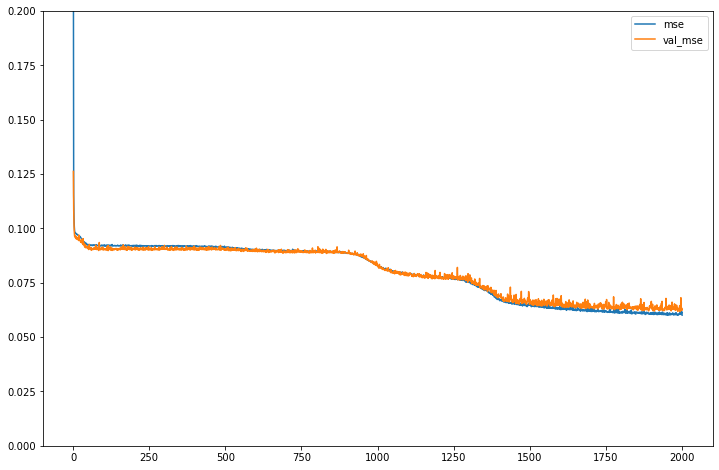

In [73]:
mse = history_dict['mse']
val_mse = history_dict['val_mse']
epochs = range(1, len(mse) + 1)

plt.figure(figsize=(12, 8))
plt.plot(epochs, mse, label='mse')
plt.plot(epochs, val_mse, label='val_mse')
plt.ylim((0,0.2))
plt.legend(loc = 'best')
plt.show()

In [77]:
model.layers[0].set_weights(weights[0])
model.layers[1].set_weights(weights[1])
model.layers[2].set_weights(weights[2])

In [78]:
model.save('i_predict')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: i_predict\assets
